In [97]:
# Warning ! You need to install geopandas on anaconda first
import os
import pandas as pd
import numpy as np
import json
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from haversine import haversine, Unit

### General cleaning of the dataset

In [53]:
fname = "./BikePaths/reseau_cyclable_2018_c.geojson"

bp = gpd.read_file(fname)

print(type(bp))

bp[0:3]

<class 'geopandas.geodataframe.GeoDataFrame'>


ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE SEPARATEUR  \
0  8998.0   1230109.0        4.0         0.0      90.0       2.0          M   
1     2.0         0.0        5.0         0.0      20.0       2.0       None   
2     3.0   1623974.0        1.0         0.0      36.0       2.0       None   

  SAISONS4 PROTEGE_4S Ville_MTL                                NOM_ARR_VI  \
0      OUI        OUI       OUI                     Le Plateau-Mont-Royal   
1      NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   
2      NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                            geometry  
0  (LINESTRING Z (-73.59024203982732 45.532589280...  
1  (LINESTRING Z (-73.49679478102101 45.695741649...  
2  (LINESTRING Z (-73.57344998170396 45.658526272...

In [54]:
print(bp.Ville_MTL.unique())

['OUI' 'NON']


In [55]:
bp = bp[bp['Ville_MTL']=='OUI']

In [56]:
print(bp.Ville_MTL.unique())

['OUI']


In [57]:
bp[0:3]

ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE SEPARATEUR  \
0  8998.0   1230109.0        4.0         0.0      90.0       2.0          M   
1     2.0         0.0        5.0         0.0      20.0       2.0       None   
2     3.0   1623974.0        1.0         0.0      36.0       2.0       None   

  SAISONS4 PROTEGE_4S Ville_MTL                                NOM_ARR_VI  \
0      OUI        OUI       OUI                     Le Plateau-Mont-Royal   
1      NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   
2      NON        NON       OUI  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                            geometry  
0  (LINESTRING Z (-73.59024203982732 45.532589280...  
1  (LINESTRING Z (-73.49679478102101 45.695741649...  
2  (LINESTRING Z (-73.57344998170396 45.658526272...

In [58]:
bp = bp.reset_index(drop=True)

In [59]:
bp[5636:]

ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE  \
5636  9056.0   4012356.0        4.0         0.0     745.0       2.0   
5637  9057.0      9999.0        1.0         0.0       8.0       2.0   
5638  9058.0   4012364.0        1.0         0.0      10.0       2.0   

     SEPARATEUR SAISONS4 PROTEGE_4S Ville_MTL  \
5636          M      NON        NON       OUI   
5637          M      NON        NON       OUI   
5638          M      NON        NON       OUI   

                                    NOM_ARR_VI  \
5636  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5637  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5638  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                               geometry  
5636  (LINESTRING Z (-73.54331042277438 45.658472763...  
5637  (LINESTRING Z (-73.54022970362077 45.660267491...  
5638  (LINESTRING Z (-73.54030765675135 45.660338646...

In [60]:
len(bp)

5639

In [63]:
bp = bp.drop(columns=['ID', 'ID_TRC_GEO', 'TYPE_VOIE', 'TYPE_VOIE2', 'SEPARATEUR', 'SAISONS4', 'PROTEGE_4S', 'Ville_MTL'])

In [64]:
bp[5636:]

LONGUEUR  NBR_VOIE                                NOM_ARR_VI  \
5636     745.0       2.0  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5637       8.0       2.0  Rivi�re-des-Prairies�Pointe-aux-Trembles   
5638      10.0       2.0  Rivi�re-des-Prairies�Pointe-aux-Trembles   

                                               geometry  
5636  (LINESTRING Z (-73.54331042277438 45.658472763...  
5637  (LINESTRING Z (-73.54022970362077 45.660267491...  
5638  (LINESTRING Z (-73.54030765675135 45.660338646...

In [89]:
bp['distances'] = bp.apply(lambda x: np.array([]),axis=1)

In [98]:
for k in range(len(bp)):
    distances = np.array([])
    for l in range(len(bp['geometry'][k])):
        subdistances = np.array([])
        for m in range(len(bp['geometry'][k][l].xy[0])-1):
            #distances[l] = np.append(distances[l], haversine((x.latitude_start,x.longitude_start),(x.latitude_end,x.longitude_end)))
            subdistances = np.append(subdistances, haversine((bp['geometry'][k][l].xy[1][m], bp['geometry'][k][l].xy[0][m]),(bp['geometry'][k][l].xy[1][m+1], bp['geometry'][k][l].xy[0][m+1])))
        distances = np.append(distances, subdistances, axis=0)
    bp['distances'][k] = distances

C:\Users\quent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [99]:
bp.head(4)

LONGUEUR  NBR_VOIE                                NOM_ARR_VI  \
0      90.0       2.0                     Le Plateau-Mont-Royal   
1      20.0       2.0  Rivi�re-des-Prairies�Pointe-aux-Trembles   
2      36.0       2.0  Rivi�re-des-Prairies�Pointe-aux-Trembles   
3      46.0       1.0                     Ahuntsic-Cartierville   

                                            geometry               distances  
0  (LINESTRING Z (-73.59024203982732 45.532589280...   [0.08974675564772874]  
1  (LINESTRING Z (-73.49679478102101 45.695741649...   [0.02002003601877969]  
2  (LINESTRING Z (-73.57344998170396 45.658526272...   [0.03557510452716641]  
3  (LINESTRING Z (-73.71793473411516 45.535498916...  [0.046320561688316865]

In [105]:
bp['geometry'][23][0].xy

(array('d', [-73.69141255822404, -73.69150075106326, -73.69261215491484]),
 array('d', [45.51410517589583, 45.51404178278361, 45.513153727880656]))

In [106]:
bp['distances'][23]

array([0.00984431, 0.13134106])

In [86]:
bp['geometry'][27][0].xy[0][11]
bp['geometry'][k][l].xy[0][m+1]

-73.66089996923596

In [ ]:
# Longitude : around -73
# Latitude : around 45.5

### Tests on single bikepaths

In [40]:
bikelane0 = bp['geometry'][21]

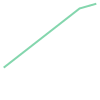

In [41]:
bikelane0

In [42]:
len(bikelane0) # bikelane0 is a MultiLineString, a list of lines

1

In [43]:
bikelane0[0].xy

(array('d', [-73.70507322331356, -73.70512206055538, -73.70534364804561]),
 array('d', [45.511033604253775, 45.51101969231954, 45.510846873492184]))

In [44]:
bikelane0[0].xy[0] # -> y axis

array('d', [-73.70507322331356, -73.70512206055538, -73.70534364804561])

### Informations about the global dataset

In [45]:
mean_length = bp.LONGUEUR.mean()
print(mean_length)

133.49512324880297


In [48]:
sum_length = bp.LONGUEUR.sum()
print(sum_length)

752779.0


In [49]:
count = 0
print("These are multilines roads")
for k in range(len(bp['geometry'])):
    if (len(bp['geometry'][k])>1):
        print(k)
    count+=len(bp['geometry'][k])
print("Overal number of different lines :", count)

These are multilines roads
204
466
602
658
859
862
887
923
929
938
Overal number of different lines : 5657


In [19]:
count = 0
for k in range(len(bp['geometry'])):
    for l in range(len(bp['geometry'][k])):
        count+=len(bp['geometry'][k][l].xy[0])
print("Overal number of points :", count)

Overal number of points : 26204


In [20]:
data_pointsx = np.array([])
data_pointsy = np.array([])
for k in range(len(bp['geometry'])):
    for l in range(len(bp['geometry'][k])):
        data_pointsx = np.append(data_pointsx, bp['geometry'][k][l].xy[1])
        data_pointsy = np.append(data_pointsy, bp['geometry'][k][l].xy[0])
data_points = np.vstack((data_pointsx, data_pointsy)).T # np.array([data_pointsx.tolist(), data_pointsy.tolist()]).T

In [21]:
data_points[0]

array([ 45.53258928, -73.59024204])

In [22]:
geo_json_data = json.load(open("./BikePaths/reseau_cyclable_2018_c.geojson"))

In [23]:
m_bike = folium.Map([45.53,-73.666], tiles='cartodbpositron', zoom_start=11)
HeatMap(data_points).add_to(m_bike)
m_bike

In [35]:
geo_json_data['features'].head()

AttributeError: 'list' object has no attribute 'head'

In [51]:
print(geo_json_data['features'][0]['properties']['LONGUEUR'])

for k in reversed(range(len(geo_json_data['features']))):
    if geo_json_data['features'][k]['properties']['LONGUEUR'] <= mean_length:
        geo_json_data['features'].remove(geo_json_data['features'][k])


90.0


In [52]:
#geo_json_data['features'] = geo_json_data['features']#[0:5]

In [5]:
m_bike = folium.Map([45.53,-73.666], tiles='cartodbpositron', zoom_start=11)
folium.GeoJson(geo_json_data).add_to(m_bike)
m_bike